In [1]:
import pandas as pd
import pyodbc as pyo
import matplotlib.pyplot as plt
import seaborn as sns

# LẤY DỮ LIỆU TỪ SQL SERVER XUỐNG PYTHON

In [2]:
def connect_database():
    drivers = 'ODBC Driver 17 for SQL Server'
    SeverName = 'DESKTOP-L8OJDR9\SQLEXPRESS01'
    db = 'CHUNGKHOAN'
    connection = pyo.connect(driver = drivers, 
                            host = SeverName ,database = db ,trusted_connection = 'yes')
    conn = connection
    cur = conn.cursor()
    return cur,conn

In [3]:
cur,conn = connect_database()

In [4]:
my_dict_1 = {
    'StockCode' : [],
    'Name_Company': [],
    'CompanyID': [],
    'Majority' : [],
    'sum_PCT': [],
    'rank_pct_change':[],
    'Note': []
}
my_dict_2 = {
    'StockCode' : [],
    'Day_Trading': [],
    'Closing_Price': [],
    'Opening_Price':[] ,
    'Highest_Price':[] ,
    'Lowest_Price':[],
    'Majority':[]
}

In [5]:
query_select_1 = "SELECT * FROM Data_visualization_1"
for element in cur.execute(query_select_1):
    my_dict_1['StockCode'].append(element.StockCode)
    my_dict_1['Name_Company'].append(element.Name_Company)
    my_dict_1['CompanyID'].append(element.Company_ID)
    my_dict_1['Majority'].append(element.Majority)
    my_dict_1['sum_PCT'].append(element.sum_PCT)
    my_dict_1['rank_pct_change'].append(element.rank_pct_change)
    my_dict_1['Note'].append(element.Note)

In [6]:
query_select_2 = "SELECT * FROM Data_visualization_2"
for element in cur.execute(query_select_2):
    my_dict_2['StockCode'].append(element.StockCode)
    my_dict_2['Day_Trading'].append(element.Day_Trading)
    my_dict_2['Closing_Price'].append(element.Closing_Price)
    my_dict_2['Opening_Price'].append(element.Opening_Price)
    my_dict_2['Highest_Price'].append(element.Highest_Price)
    my_dict_2['Lowest_Price'].append(element.Lowest_Price)
    my_dict_2['Majority'].append(element.Majority)


In [7]:
for key in my_dict_1:
    print(key,' has len : ',len(my_dict_1[key]))

StockCode  has len :  417
Name_Company  has len :  417
CompanyID  has len :  417
Majority  has len :  417
sum_PCT  has len :  417
rank_pct_change  has len :  417
Note  has len :  417


In [8]:
for key in my_dict_2:
    print(key,' has len : ',len(my_dict_2[key]))

StockCode  has len :  33836
Day_Trading  has len :  33836
Closing_Price  has len :  33836
Opening_Price  has len :  33836
Highest_Price  has len :  33836
Lowest_Price  has len :  33836
Majority  has len :  33836


   # DATAFRAME 1
   - Phân tích tỉ lệ cổ phiếu tăng và giảm của từng ngành
   - Xem xét mức độ lợi nhuận của Cổ phiếu tăng và cổ phiếu giảm

In [9]:
df1 = pd.DataFrame(my_dict_1)
df1.head(5)

,StockCode,Name_Company,CompanyID,Majority,sum_PCT,rank_pct_change,Note
0,AAA,CTCP Nhựa An Phát Xanh,2541,SX Nhựa - Hóa chất,14.341394,32,Cổ phiếu tăng
1,AAM,CTCP Thủy sản MeKong,1813,Chế biến Thủy sản,-1.260504,227,Cổ phiếu giảm
2,AAT,CTCP Tập Đoàn Tiên Sơn Thanh Hóa,3905,Bán buôn,-10.039804,70,Cổ phiếu giảm
3,ABR,CTCP Đầu tư Nhãn hiệu Việt,4473,Bán buôn,13.533656,34,Cổ phiếu tăng
4,ABS,CTCP Dịch vụ Nông nghiệp Bình Thuận,4784,Bán buôn,-8.603539,87,Cổ phiếu giảm


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StockCode        417 non-null    object 
 1   Name_Company     417 non-null    object 
 2   CompanyID        417 non-null    int64  
 3   Majority         417 non-null    object 
 4   sum_PCT          417 non-null    float64
 5   rank_pct_change  417 non-null    int64  
 6   Note             417 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 22.9+ KB


In [11]:
group_note = df1.groupby(['Note','Majority']).count()['StockCode']
group_note

Note           Majority              
Cổ phiếu giảm  Bán buôn                  22
               Bán lẻ                    12
               Bảo hiểm                   2
               Bất động sản              30
               Chăm sóc sức khỏe          9
               Chế biến Thủy sản          6
               Chứng chỉ quỹ             12
               Chứng khoán                2
               Công nghệ và thông tin     4
               Khai khoáng                4
               Ngành khác                23
               Ngân hàng                 12
               Nông - Lâm - Ngư           6
               SX Hàng gia dụng           8
               SX Nhựa - Hóa chất        18
               SX Thiết bị, máy móc       4
               Sản phẩm cao su            3
               Thực phẩm - Đồ uống       11
               Tiện ích                  12
               Vận tải - kho bãi         18
               Vật liệu xây dựng         13
               Xây dựng               

In [12]:
group_majority = df1.groupby('Majority').count()['StockCode']
group_majority

Majority
Bán buôn                  32
Bán lẻ                    15
Bảo hiểm                   5
Bất động sản              58
Chăm sóc sức khỏe         11
Chế biến Thủy sản          8
Chứng chỉ quỹ             14
Chứng khoán               14
Công nghệ và thông tin     6
Khai khoáng                9
Ngành khác                38
Ngân hàng                 18
Nông - Lâm - Ngư           9
SX Hàng gia dụng          14
SX Nhựa - Hóa chất        26
SX Thiết bị, máy móc       4
Sản phẩm cao su            4
Thực phẩm - Đồ uống       18
Tiện ích                  31
Vận tải - kho bãi         31
Vật liệu xây dựng         19
Xây dựng                  33
Name: StockCode, dtype: int64

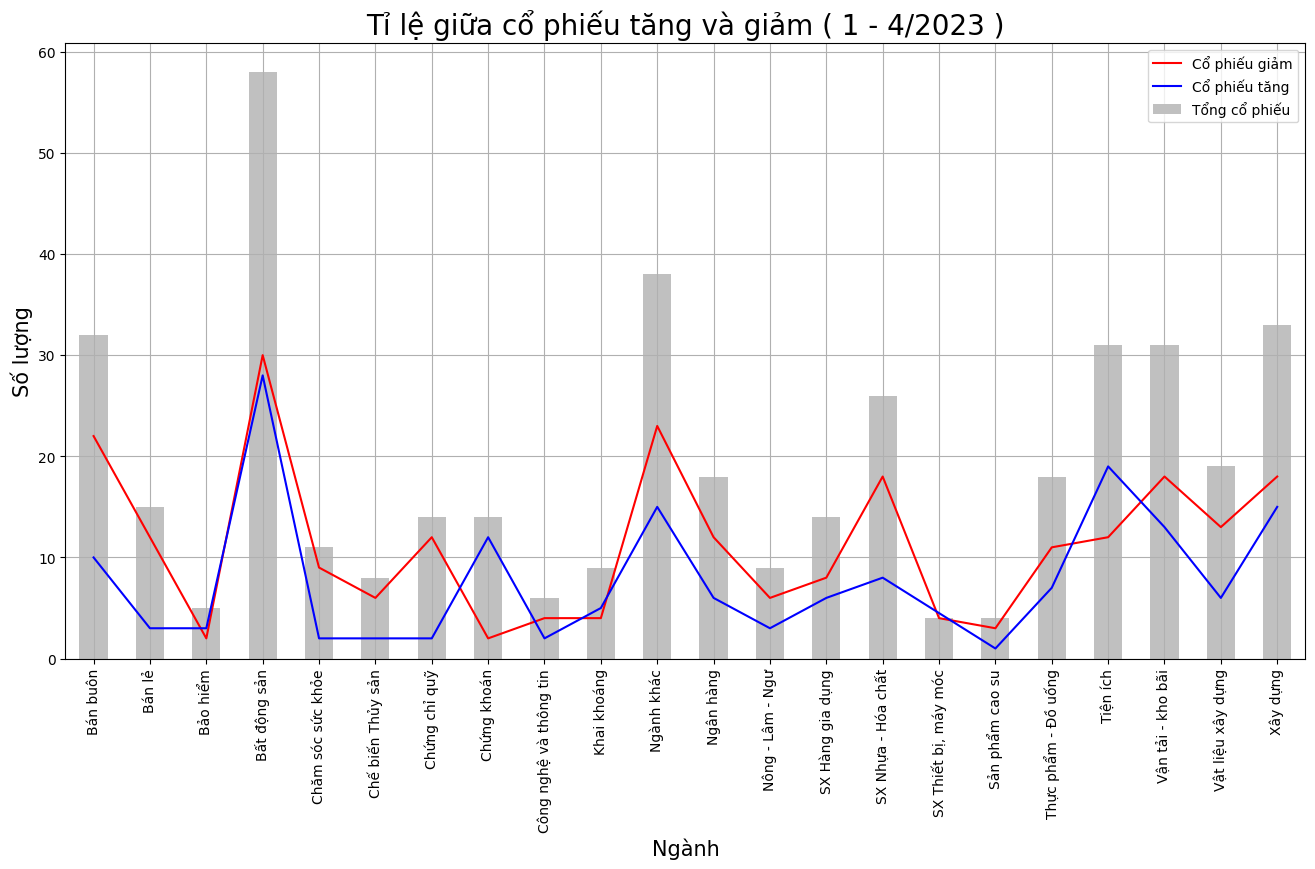

In [13]:
fig , ax = plt.subplots(figsize = (16,8))
group_majority.plot(kind = 'bar',label = 'Tổng cổ phiếu',color = 'silver')
plt.plot(group_note['Cổ phiếu giảm'].index, group_note['Cổ phiếu giảm'].values,color = 'r',label = 'Cổ phiếu giảm')
plt.plot(group_note['Cổ phiếu tăng'].index, group_note['Cổ phiếu tăng'].values,color ='blue',label = 'Cổ phiếu tăng')
plt.legend()
plt.ylabel('Số lượng', fontsize = 15)
plt.title('Tỉ lệ giữa cổ phiếu tăng và giảm ( 1 - 4/2023 )', fontsize = 20)
plt.xlabel('Ngành', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid();

In [14]:
df_1_1 = df1[['StockCode','sum_PCT','Note']]
df_1_1

,StockCode,sum_PCT,Note
0,AAA,14.341394,Cổ phiếu tăng
1,AAM,-1.260504,Cổ phiếu giảm
2,AAT,-10.039804,Cổ phiếu giảm
3,ABR,13.533656,Cổ phiếu tăng
4,ABS,-8.603539,Cổ phiếu giảm
...,...,...,...
412,VSI,-8.555772,Cổ phiếu giảm
413,VTB,-21.805332,Cổ phiếu giảm
414,VTO,29.148695,Cổ phiếu tăng
415,YBM,9.860473,Cổ phiếu tăng


In [15]:
data_up = df_1_1[df_1_1['Note'] == 'Cổ phiếu tăng']
data_up.sort_values('sum_PCT')

,StockCode,sum_PCT,Note
149,HAI,0.000000,Cổ phiếu tăng
122,FUCTVGF3,0.000000,Cổ phiếu tăng
123,FUCTVGF4,0.000000,Cổ phiếu tăng
135,GAB,0.000000,Cổ phiếu tăng
263,PLX,0.184896,Cổ phiếu tăng
...,...,...,...
38,BSI,32.819678,Cổ phiếu tăng
219,MCP,33.622113,Cổ phiếu tăng
170,HQC,45.110124,Cổ phiếu tăng
317,ST8,47.584723,Cổ phiếu tăng


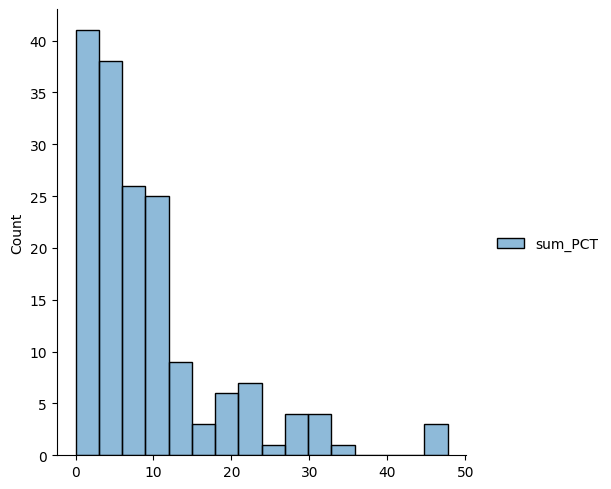

In [16]:
sns.displot(data_up[['StockCode','sum_PCT']])

In [17]:
data_down = df_1_1[df_1_1['Note'] == 'Cổ phiếu giảm']
data_down.sort_values('sum_PCT')


,StockCode,sum_PCT,Note
366,TTB,-46.094932,Cổ phiếu giảm
13,AGM,-44.545058,Cổ phiếu giảm
321,SVC,-43.372445,Cổ phiếu giảm
107,EIB,-35.349546,Cổ phiếu giảm
202,KPF,-31.761954,Cổ phiếu giảm
...,...,...,...
195,KBC,-0.197527,Cổ phiếu giảm
378,VCB,-0.120045,Cổ phiếu giảm
339,TDM,-0.119459,Cổ phiếu giảm
131,FUESSV50,-0.058795,Cổ phiếu giảm


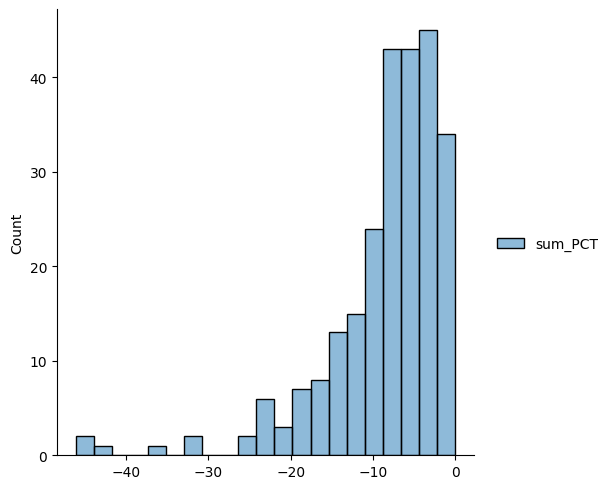

In [18]:
sns.displot(data_down[['StockCode','sum_PCT']])

In [19]:
df1.head()

,StockCode,Name_Company,CompanyID,Majority,sum_PCT,rank_pct_change,Note
0,AAA,CTCP Nhựa An Phát Xanh,2541,SX Nhựa - Hóa chất,14.341394,32,Cổ phiếu tăng
1,AAM,CTCP Thủy sản MeKong,1813,Chế biến Thủy sản,-1.260504,227,Cổ phiếu giảm
2,AAT,CTCP Tập Đoàn Tiên Sơn Thanh Hóa,3905,Bán buôn,-10.039804,70,Cổ phiếu giảm
3,ABR,CTCP Đầu tư Nhãn hiệu Việt,4473,Bán buôn,13.533656,34,Cổ phiếu tăng
4,ABS,CTCP Dịch vụ Nông nghiệp Bình Thuận,4784,Bán buôn,-8.603539,87,Cổ phiếu giảm


 # DATAFRAME 2
 - Xây dựng biểu đồ nến để phân tích kỹ thuật
 - Xem xét sự tương quan của các công ty trong mỗi ngành


In [20]:
df2 = pd.DataFrame(my_dict_2)
df2.head()

,StockCode,Day_Trading,Closing_Price,Opening_Price,Highest_Price,Lowest_Price,Majority
0,AAA,2023-01-03,7150,6810,7150,6810,SX Nhựa - Hóa chất
1,AAM,2023-01-03,11900,12000,12000,11700,Chế biến Thủy sản
2,AAT,2023-01-03,5100,4960,5100,4950,Bán buôn
3,ABR,2023-01-03,8710,8710,8710,8710,Bán buôn
4,ABS,2023-01-03,5580,5240,5580,5220,Bán buôn


In [21]:
def status (open_price,close_price):
    if open_price < close_price:
        value = 'Increase'
    elif open_price > close_price:
        value = 'Decrease'
    else:
        value = 'Equal'
    return value

In [22]:
df2['Status'] = [status(open_price,close_price) for open_price,close_price in zip(df2.Opening_Price,df2.Closing_Price)]

df2.head(5)


,StockCode,Day_Trading,Closing_Price,Opening_Price,Highest_Price,Lowest_Price,Majority,Status
0,AAA,2023-01-03,7150,6810,7150,6810,SX Nhựa - Hóa chất,Increase
1,AAM,2023-01-03,11900,12000,12000,11700,Chế biến Thủy sản,Decrease
2,AAT,2023-01-03,5100,4960,5100,4950,Bán buôn,Increase
3,ABR,2023-01-03,8710,8710,8710,8710,Bán buôn,Equal
4,ABS,2023-01-03,5580,5240,5580,5220,Bán buôn,Increase


In [23]:
major = df2.Majority
major = major.drop_duplicates()
majority = [x for x in major]
majority

['SX Nhựa - Hóa chất',
 'Chế biến Thủy sản',
 'Bán buôn',
 'Ngân hàng',
 'Vật liệu xây dựng',
 'Ngành khác',
 'SX Hàng gia dụng',
 'Bất động sản',
 'Thực phẩm - Đồ uống',
 'Chứng khoán',
 'Bán lẻ',
 'Nông - Lâm - Ngư',
 'Vận tải - kho bãi',
 'Tiện ích',
 'Xây dựng',
 'Bảo hiểm',
 'Khai khoáng',
 'Sản phẩm cao su',
 None,
 'Công nghệ và thông tin',
 'Chăm sóc sức khỏe',
 'Chứng chỉ quỹ',
 'SX Thiết bị, máy móc']

In [25]:
ma_jor = majority[3]
company_each_major = df2[df2['Majority'] == ma_jor]
company_each_major

,StockCode,Day_Trading,Closing_Price,Opening_Price,Highest_Price,Lowest_Price,Majority,Status
6,ACB,2023-01-03,22700,22000,22700,21950,Ngân hàng,Increase
32,BID,2023-01-03,41200,39300,41200,39050,Ngân hàng,Increase
120,CTG,2023-01-03,28000,27350,28000,27250,Ngân hàng,Increase
185,EIB,2023-01-03,27400,27850,28000,27350,Ngân hàng,Decrease
189,EVF,2023-01-03,8160,8310,8480,8120,Ngân hàng,Decrease
...,...,...,...,...,...,...,...,...
33747,TCB,2023-04-13,30400,30600,30950,30300,Ngân hàng,Decrease
33779,TPB,2023-04-13,23100,23400,23400,23100,Ngân hàng,Decrease
33797,VCB,2023-04-13,88100,88300,88500,87800,Ngân hàng,Decrease
33807,VIB,2023-04-13,21100,21350,21350,21000,Ngân hàng,Decrease


<function matplotlib.pyplot.show(close=None, block=None)>

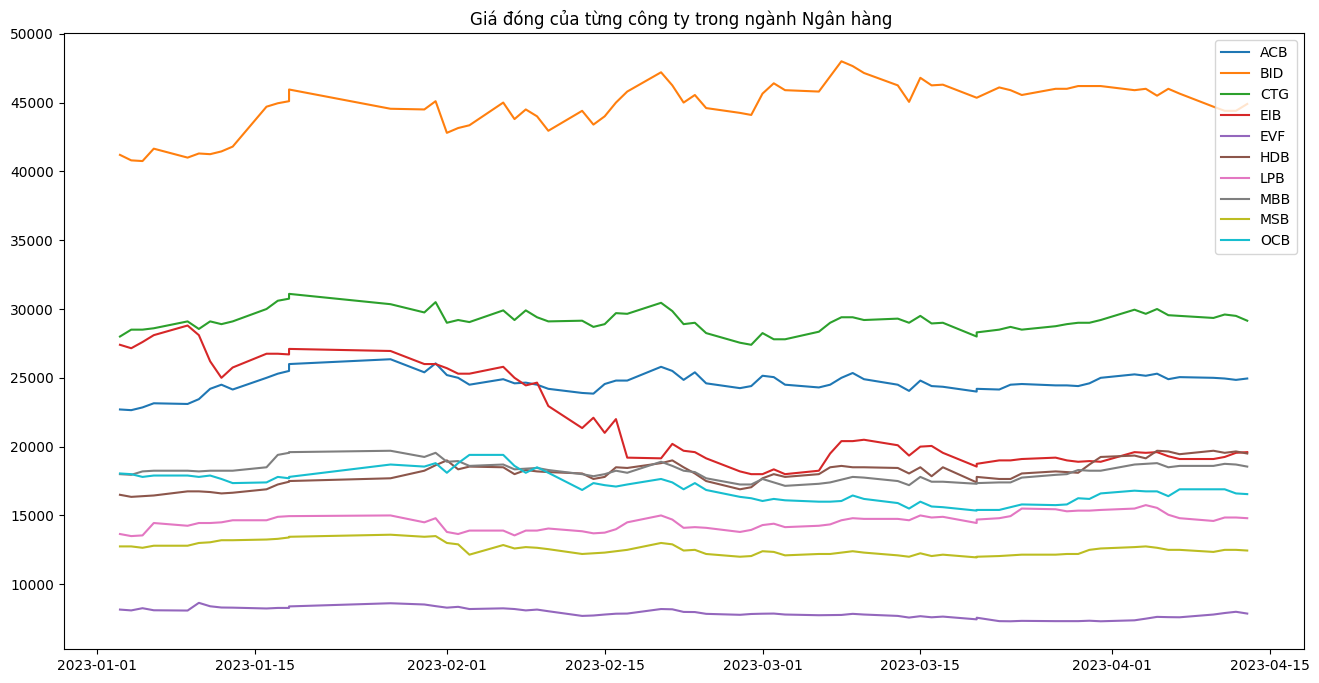

In [26]:
fig, ax = plt.subplots(figsize = (16,8))
name_company = company_each_major.StockCode
name_company.drop_duplicates()
name = [x for x in name_company]
for x in name[0:10]:
    new_data = company_each_major[company_each_major['StockCode'] == x]
    plt.plot('Day_Trading','Closing_Price',data = new_data,label = x)
plt.title('Giá đóng của từng công ty trong ngành {} '.format(ma_jor))
plt.legend()
plt.show

In [27]:
import plotly.graph_objects as go
code_company = name[0]
company_data = df2[df2['StockCode'] == code_company]
fig = go.Figure(data = [go.Candlestick(x = company_data.Day_Trading
                                     ,open = company_data.Opening_Price, high = company_data.Highest_Price,
                                     low = company_data.Lowest_Price, close = company_data.Closing_Price)])
fig.update_layout(xaxis_rangeslider_visible=False,title = 'CandleSticks Chart of {} '.format(code_company))
fig.show()

# XEM XÉT SỰ TƯƠNG QUAN CỦA GIÁ ĐÓNG CỬA TRUNG BÌNH CỦA NGÂN HÀNG

In [28]:
df3 = company_each_major.copy()

In [29]:
df3 = df3[['StockCode', 'Day_Trading', 'Closing_Price']]
df3

,StockCode,Day_Trading,Closing_Price
6,ACB,2023-01-03,22700
32,BID,2023-01-03,41200
120,CTG,2023-01-03,28000
185,EIB,2023-01-03,27400
189,EVF,2023-01-03,8160
...,...,...,...
33747,TCB,2023-04-13,30400
33779,TPB,2023-04-13,23100
33797,VCB,2023-04-13,88100
33807,VIB,2023-04-13,21100


In [30]:
def convert_month(x):
    return x.month
df3['month'] = df3['Day_Trading'].apply(convert_month)
df3

,StockCode,Day_Trading,Closing_Price,month
6,ACB,2023-01-03,22700,1
32,BID,2023-01-03,41200,1
120,CTG,2023-01-03,28000,1
185,EIB,2023-01-03,27400,1
189,EVF,2023-01-03,8160,1
...,...,...,...,...
33747,TCB,2023-04-13,30400,4
33779,TPB,2023-04-13,23100,4
33797,VCB,2023-04-13,88100,4
33807,VIB,2023-04-13,21100,4


In [31]:
group_month = df3.groupby(['StockCode','month']).agg({'Closing_Price' : 'mean'})
group_month

Closing_Price
StockCode month               
ACB       1       24396.875000
          2       24712.500000
          3       24571.739130
          4       25044.444444
BID       1       42878.125000
...                        ...
VIB       4       21338.888889
VPB       1       19121.875000
          2       17642.500000
          3       19434.782609
          4       20966.666667

[72 rows x 1 columns]

In [32]:
df_subset = group_month.pivot_table(values = 'Closing_Price',index = 'month',columns = 'StockCode')
df_subset

StockCode,ACB,BID,CTG,EIB,EVF,HDB,LPB,MBB,MSB,OCB,SHB,SSB,STB,TCB,TPB,VCB,VIB,VPB
month,,,,,,,,,,,,,,,,,,
1,24396.875000,42878.125000,29462.500000,26896.875000,8320.625000,17053.125000,14450.000000,18696.875000,13134.375000,17943.750000,10718.750000,33762.500000,25318.750000,28190.625000,22950.000000,87362.500000,21800.000000,19121.875000
2,24712.500000,44455.000000,29112.500000,21940.000000,8019.500000,18165.000000,14012.500000,18247.500000,12507.500000,17675.000000,10146.000000,32042.500000,24767.500000,27525.000000,23882.500000,93045.000000,21830.000000,17642.500000
3,24571.739130,46215.217391,28773.913043,19208.695652,7577.391304,18169.565217,14828.260870,17626.086957,12204.347826,15906.521739,10240.869565,32065.217391,25228.260870,27002.173913,23163.043478,90900.000000,20906.521739,19434.782609
4,25044.444444,45272.222222,29583.333333,19405.555556,7700.000000,19522.222222,15083.333333,18661.111111,12544.444444,16727.777778,11694.444444,31394.444444,26222.222222,29905.555556,22961.111111,90188.888889,21338.888889,20966.666667


In [33]:
df_subset.corr()

StockCode,ACB,BID,CTG,EIB,EVF,HDB,LPB,MBB,MSB,OCB,SHB,SSB,STB,TCB,TPB,VCB,VIB,VPB
StockCode,,,,,,,,,,,,,,,,,,
ACB,1.000000,0.474485,0.360706,-0.689528,-0.556892,0.972438,0.455326,0.220613,-0.411514,-0.295564,0.666611,-0.872119,0.640475,0.704025,0.026749,0.422115,-0.190440,0.525420
BID,0.474485,1.000000,-0.569851,-0.962469,-0.986245,0.654896,0.525118,-0.721284,-0.958711,-0.936248,-0.008335,-0.808435,0.198862,-0.122254,0.050758,0.554754,-0.872409,0.326506
CTG,0.360706,-0.569851,1.000000,0.383180,0.437047,0.196964,0.197240,0.976374,0.694130,0.530885,0.811038,0.141529,0.636133,0.885250,-0.427822,-0.512885,0.511453,0.455563
EIB,-0.689528,-0.962469,0.383180,1.000000,0.968020,-0.824444,-0.517730,0.541226,0.926685,0.837743,-0.154189,0.936792,-0.309487,-0.081881,-0.110240,-0.630953,0.747166,-0.374247
EVF,-0.556892,-0.986245,0.437047,0.968020,1.000000,-0.732007,-0.648587,0.611930,0.903907,0.946609,-0.153482,0.827741,-0.358050,-0.030390,0.080281,-0.459112,0.889393,-0.475249
HDB,0.972438,0.654896,0.196964,-0.824444,-0.732007,1.000000,0.583584,0.028994,-0.569029,-0.510146,0.617554,-0.931377,0.655596,0.608432,-0.042154,0.435827,-0.412955,0.596035
LPB,0.455326,0.525118,0.197240,-0.517730,-0.648587,0.583584,1.000000,-0.011147,-0.262743,-0.704148,0.704034,-0.394115,0.870435,0.535714,-0.789746,-0.330926,-0.740361,0.962455
MBB,0.220613,-0.721284,0.976374,0.541226,0.611930,0.028994,-0.011147,1.000000,0.797591,0.701259,0.665590,0.280449,0.455266,0.770968,-0.300603,-0.500983,0.680396,0.258972
MSB,-0.411514,-0.958711,0.694130,0.926685,0.903907,-0.569029,-0.262743,0.797591,1.000000,0.819626,0.226963,0.802612,0.052406,0.295826,-0.328230,-0.750433,0.731924,-0.055248


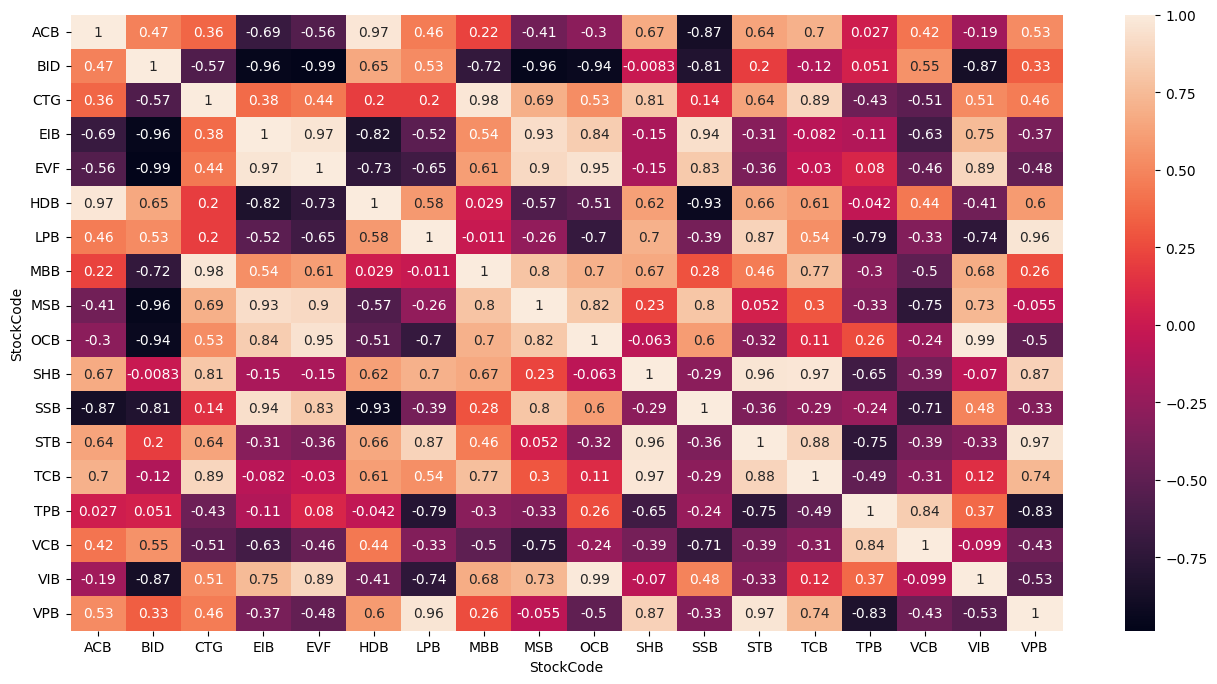

In [34]:
plt.figure(figsize = (16,8))
sns.heatmap(df_subset.corr(),annot = True)
plt.yticks(rotation = 0);

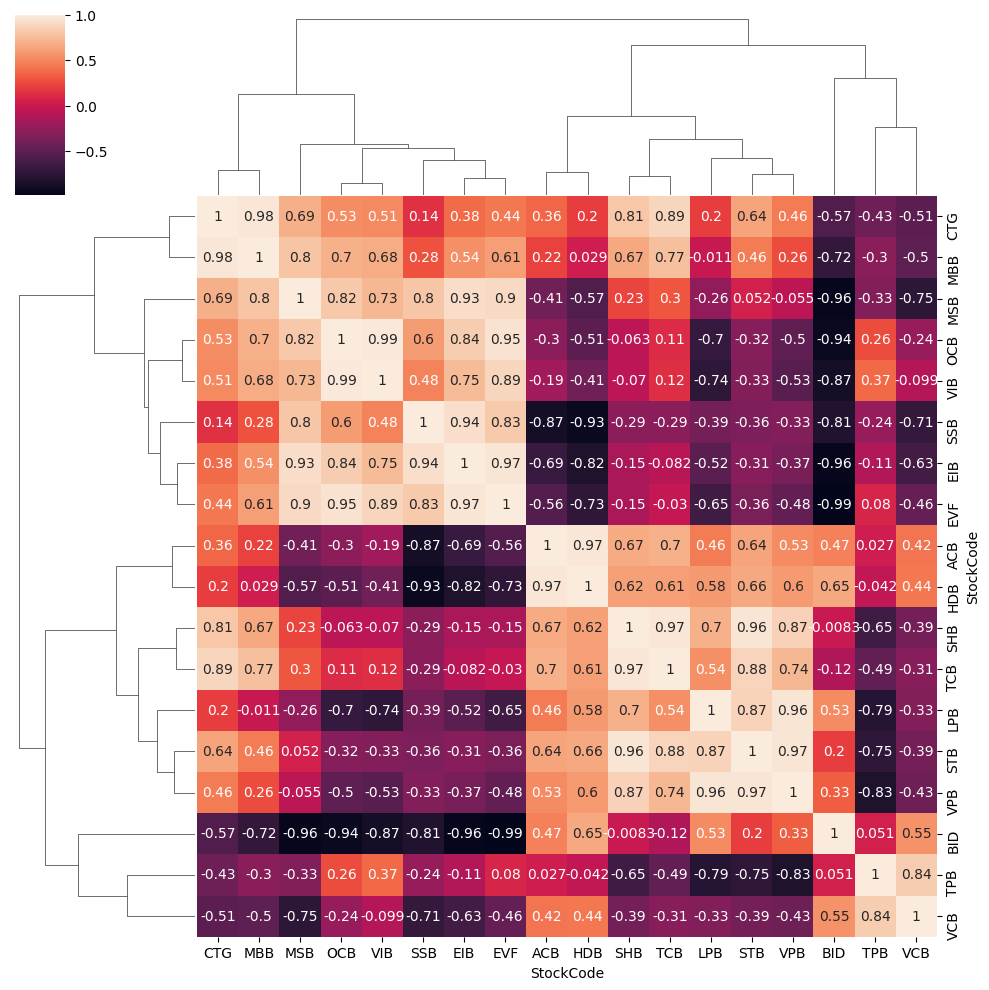

In [35]:
sns.clustermap(df_subset.corr(),annot = True)